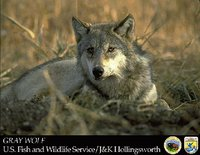

In [28]:
import json
import torchvision.transforms as transforms
from PIL import Image
from torch.autograd import Variable
import torch.nn.functional as F
import time
import torch

# input image
LABELS_file = '../imagenet-simple-labels.json'
image_file = '../imagenet_data/wolf/n02114100_16.JPEG'

# load the imagenet category list
with open(LABELS_file) as f:
    classes = json.load(f)

# load test image
img_pil = Image.open(image_file)
Image.open(image_file)

In [29]:
from torchvision.models import resnet18, ResNet18_Weights
# Cargar el modelo preentrenado de DenseNet121
weights = ResNet18_Weights.IMAGENET1K_V1
model = resnet18(weights=weights)
model.eval()  # Poner el modelo en modo de evaluación

# Definir las transformaciones para la imagen
preprocess = transforms.Compose([
    transforms.Resize(256),  # Redimensionar la imagen a 256x256 píxeles
    transforms.CenterCrop(224),  # Recortar la imagen al centro a 224x224 píxeles
    transforms.ToTensor(),  # Convertir la imagen a un tensor de PyTorch
    transforms.Normalize(mean=weights.transforms().mean, std=weights.transforms().std),  # Normalizar la imagen
])

In [30]:
img_variable = Variable(preprocess(img_pil).unsqueeze(0))
start_time = time.time()
with torch.no_grad():
    logit = model(img_variable)
end_time = time.time()
execution_time = end_time - start_time
print(f"Tiempo de ejecución: {round(execution_time, 2)} segundos")

h_x = F.softmax(logit, dim=1).data.squeeze()
probs, idx = h_x.sort(0, True)
probs = probs.numpy()
idx = idx.numpy()

# output the prediction
for i in range(0, 5):
    print('{:.3f} -> {}'.format(probs[i], classes[idx[i]]))

Tiempo de ejecución: 0.02 segundos
0.617 -> grey wolf
0.134 -> coyote
0.099 -> Alaskan tundra wolf
0.040 -> red wolf
0.039 -> dingo
